# Import, Simple Data Check, Basic Visualization 

In [1]:
import pandas as pd 
from pandas_datareader import data as wb
import yfinance 
import matplotlib.pyplot as plt

In [2]:
yfinance.pdr_override()

## Import Data From yfinance & Data Check 

In [4]:
ihsg = wb.get_data_yahoo('^JKSE', start = '2010-01-01', end = '2023-04-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
ihsg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2533.947998,2576.055908,2532.895996,2575.413086,2575.413086,18339300
2010-01-05,2575.616943,2606.069092,2575.616943,2605.277100,2605.277100,57043800
2010-01-06,2605.480957,2622.115967,2587.709961,2603.297119,2603.297119,51569100
2010-01-07,2603.500977,2611.603027,2570.272949,2586.895020,2586.895020,45510800
2010-01-08,2586.792969,2614.535889,2583.846924,2614.370117,2614.370117,73723500


In [7]:
ihsg.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,6762.253906,6772.595215,6704.751953,6708.933105,6708.933105,135182600
2023-03-28,6708.933105,6764.654785,6708.933105,6760.328125,6760.328125,126113300
2023-03-29,6760.328125,6851.505859,6760.328125,6839.436035,6839.436035,143324900
2023-03-30,6839.436035,6868.632812,6803.092773,6808.951172,6808.951172,140466800
2023-03-31,6809.092773,6831.553223,6789.609863,6805.276855,6805.276855,139015200


## Get Closing Price & Visualize Closing Price Over 13 Years

In [9]:
ihsg_close = ihsg[['Close']]

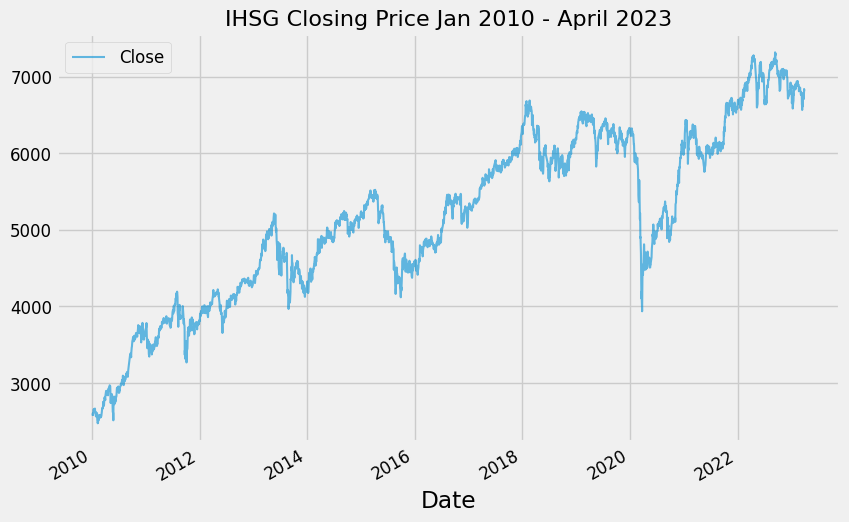

In [20]:
plt.style.use('fivethirtyeight')
ihsg_close.plot(figsize = (9,6), fontsize = 12, linewidth = 1.5, alpha = 0.6)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('IHSG Closing Price Jan 2010 - April 2023', fontsize = 16)
plt.show()

## Applying Rolling Method to The IHSG

In [40]:
ihsg_close_copy = ihsg_close.copy()

In [23]:
ihsg_close.head()

,Close
Date,
2010-01-04,2575.413086
2010-01-05,2605.277100
2010-01-06,2603.297119
2010-01-07,2586.895020
2010-01-08,2614.370117


### Mean SMA (5) Closing Price 

In [27]:
ihsg_close_copy.rolling(window = 5).mean().head(10)

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,2597.050488
2010-01-11,2608.408691
2010-01-12,2619.263477
2010-01-13,2625.178467
2010-01-14,2636.835645


In [34]:
ihsg_close_copy.rolling(window = 5, min_periods = 1).mean().head(10)

,Close
Date,
2010-01-04,2575.413086
2010-01-05,2590.345093
2010-01-06,2594.662435
2010-01-07,2592.720581
2010-01-08,2597.050488
2010-01-11,2608.408691
2010-01-12,2619.263477
2010-01-13,2625.178467
2010-01-14,2636.835645


### Median SMA (5) Closing Price 

In [28]:
ihsg_close_copy.rolling(window = 5).median().head(10)

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,2603.297119
2010-01-11,2605.277100
2010-01-12,2614.370117
2010-01-13,2632.204102
2010-01-14,2632.872070


In [35]:
ihsg_close_copy.rolling(window = 5, min_periods = 1).median().head(10)

,Close
Date,
2010-01-04,2575.413086
2010-01-05,2590.345093
2010-01-06,2603.297119
2010-01-07,2595.096069
2010-01-08,2603.297119
2010-01-11,2605.277100
2010-01-12,2614.370117
2010-01-13,2632.204102
2010-01-14,2632.872070


# Momentum Trading Strategies With SMAs

## Creating Column of SMAs 

In [ ]:
ihsg_close_copy['sma50'] = ihsg_close_copy.rolling(window = 50, min_periods = 50).mean()
ihsg_close_copy.head(50)

In [44]:
ihsg_close_copy['sma200'] = ihsg_close_copy['Close'].rolling(window = 200).mean()

In [46]:
ihsg_close_copy.head()

,Close,sma50,sma200
Date,,,
2010-01-04,2575.413086,NaN,NaN
2010-01-05,2605.277100,NaN,NaN
2010-01-06,2603.297119,NaN,NaN
2010-01-07,2586.895020,NaN,NaN
2010-01-08,2614.370117,NaN,NaN


## Visualizing SMAs & Closing Price

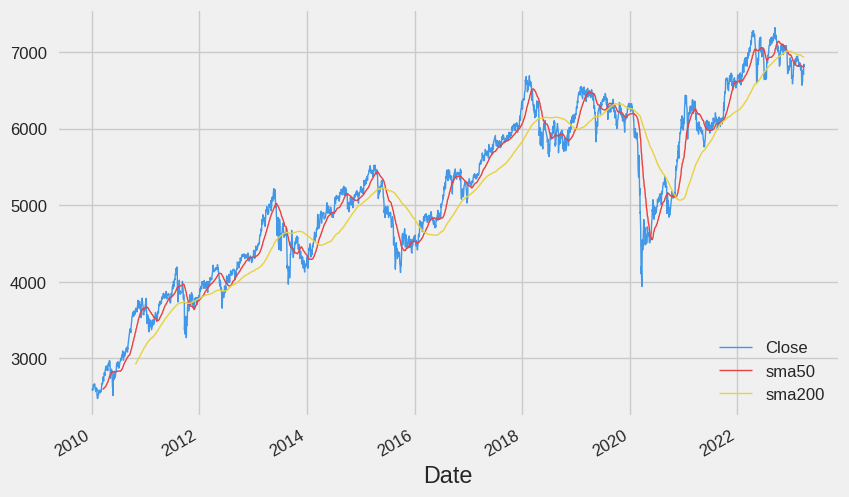

In [59]:
plt.style.use('fivethirtyeight')
ihsg_close_copy.plot(figsize = (9,6), fontsize = 12, linewidth = 1, color = ['#4197e8','#e84141', '#e8d241'])
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

### Visualizing Shorter & Longer SMA

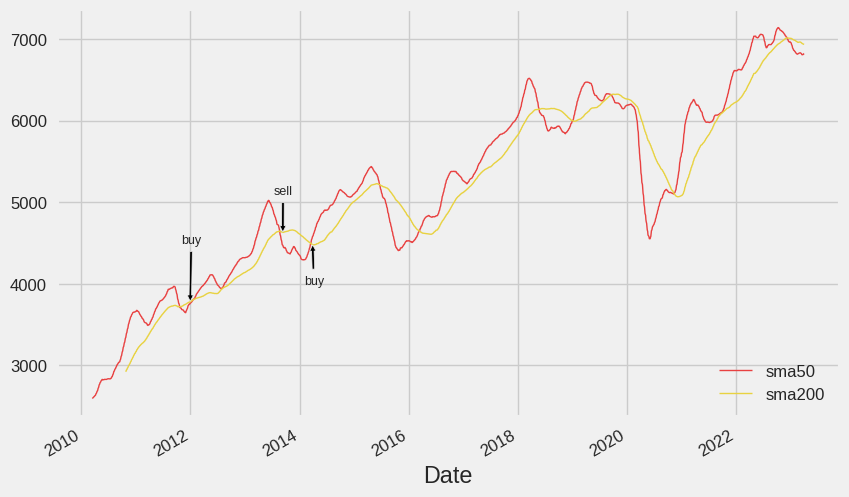

In [115]:
ihsg_close_copy.iloc[:, -2:].plot(figsize = (9,6), fontsize = 12, linewidth = 1, color = ['#e84141', '#e8d241'])
plt.annotate('buy', xy = ('2011-12-30', 3750), fontsize = 9, xytext = ('2011-10-31', 4500) ,arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.annotate('sell', xy = ('2013-09-10', 4600), fontsize = 9, xytext = ('2013-07-10', 5100) ,arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.annotate('buy', xy = ('2014-03-28', 4510), fontsize = 9, xytext = ('2014-01-28', 4000) ,arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

## Momentum Strategies

The idea behind momentum strategies trading is to buy when the lower SMA is crossing up the higher SMA as the lower SMA are more reactive to the closing price as it has lower window. From the chart you can see that when the lower SMA is crossing up the higher SMA the price tend to rally up, when the higher SMA crossed down the lower SMA the price tend to fell down thus you should sell when the higher sma is crossing down the lower SMA 